In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
#'2017-08-23'
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#'2010-01-01'
#session.query(Measurement.date).order_by(Measurement.date).first()

('2017-08-23',)

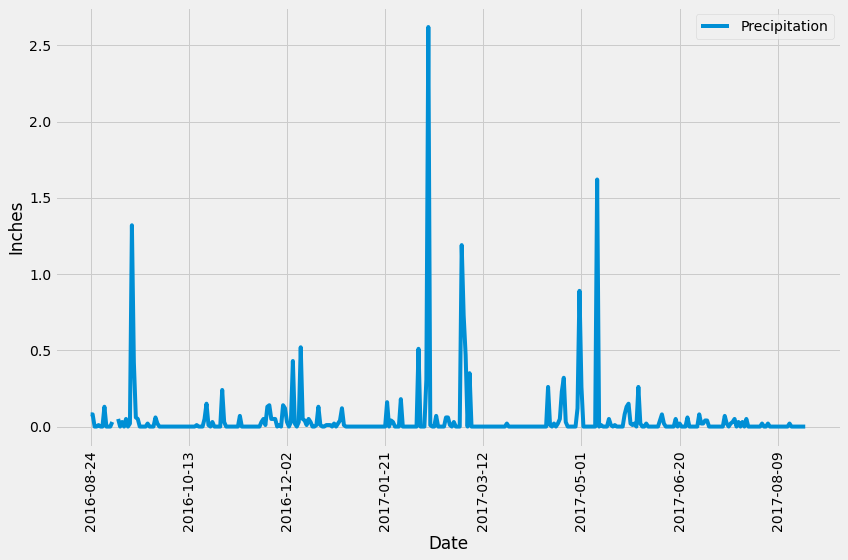

In [82]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Calculate the date one year from the last date in data set.
year = session.query(Measurement.date).filter(Measurement.date >= '2016-08-24')

# Perform a query to retrieve the data and precipitation scores
Result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-24').group_by(Measurement.date).all()

Result

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(Result,columns=['Date','Precipitation'])
df.set_index('Date', inplace = True)
df.head()

# Sort the dataframe by date
df = df.sort_values(by='Date')
df

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(figsize=(12,8))

#plt.title("Precipitation 2016-08-24 - 2017-08-23")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



In [74]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()


,Precipitation
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [75]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station.id).distinct().count()
stations

9

In [76]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [78]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'
temperature = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))\
                .filter(Measurement.station == most_active_station).all()
temperature

[(54.0, 85.0, 71.66378066378067)]

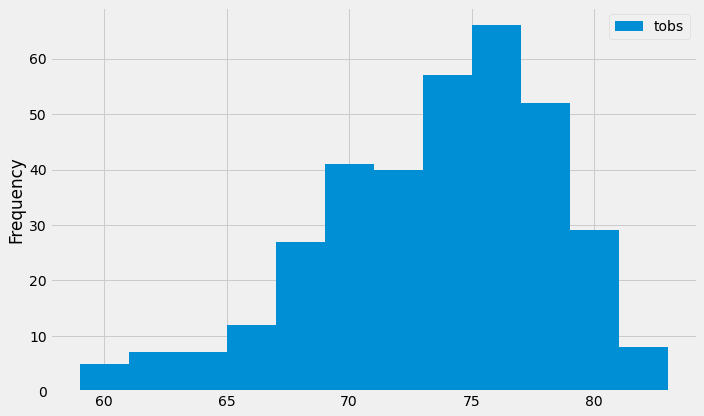

In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observation = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station)\
                    .filter(Measurement.date >= '2016-08-24').all()

#save as a data frame
temp_observation_df = pd.DataFrame(temp_observation, columns = ['date', 'temperature'])


temp_observation_df.plot.hist(bins = 12, figsize=(10,6))

plt.legend(['tobs'], loc="upper right")
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()






# Close session

In [86]:
# Close Session
session.close()